In [1]:
!nvidia-smi


Wed Oct 16 16:43:10 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!unzip /content/dataset.zip

Archive:  /content/dataset.zip
  inflating: imbalanced_data.csv     
  inflating: raw_data.csv            


In [3]:
import pandas as pd

In [4]:
imbalanced_data = pd.read_csv('/content/imbalanced_data.csv')

In [5]:
imbalanced_data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


# EDA

In [6]:
import seaborn as sns

<Axes: xlabel='label', ylabel='count'>

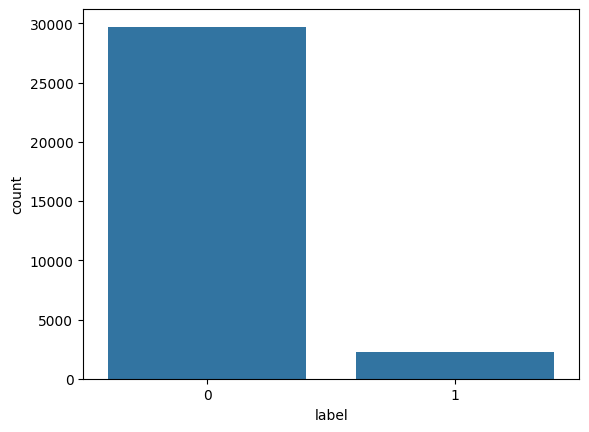

In [7]:
sns.countplot(x = 'label', data = imbalanced_data)

## Imbalanced Data as per plot
## 0 ----> No Hate
## 1 ----> Hate

In [8]:
imbalanced_data.shape

(31962, 3)

In [9]:
imbalanced_data.isnull().sum()

,0
id,0
label,0
tweet,0


In [10]:
imbalanced_data.drop('id', axis=1, inplace=True)

In [11]:
imbalanced_data.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [12]:
raw_data = pd.read_csv('/content/raw_data.csv')

In [13]:
raw_data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [14]:
raw_data.shape

(24783, 7)

In [15]:
raw_data.isnull().sum()

,0
Unnamed: 0,0
count,0
hate_speech,0
offensive_language,0
neither,0
class,0
tweet,0


In [16]:
raw_data.drop(['Unnamed: 0','count','hate_speech','offensive_language','neither'], axis=1, inplace=True)

In [17]:
raw_data.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [18]:
raw_data['class'].unique()

array([2, 1, 0])

<Axes: xlabel='class', ylabel='count'>

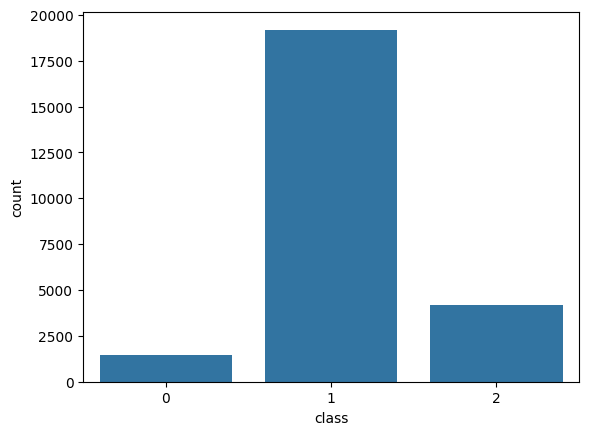

In [19]:
sns.countplot(x='class', data=raw_data)

* class 0: hate
* class 1: abusive
* class 2: no hate

In [20]:
# copy the values of the class 1 into class 0, cxs similar
raw_data[raw_data['class']==0]['class']=1

<ipython-input-20-a43421835e12>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data[raw_data['class']==0]['class']=1


In [21]:
raw_data.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [22]:
raw_data['class'].unique()

array([2, 1, 0])

In [23]:
raw_data[raw_data['class']==0]

,class,tweet
85,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1..."
89,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ..."
110,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b..."
184,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL..."
202,0,"""@NoChillPaz: ""At least I'm not a nigger"" http..."
...,...,...
24576,0,this guy is the biggest faggot omfg
24685,0,which one of these names is more offensive kik...
24751,0,you a pussy ass nigga and I know it nigga.
24776,0,you're all niggers


In [24]:
raw_data['class'].replace({0:1}, inplace=True)


<ipython-input-24-ee8461455449>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_data['class'].replace({0:1}, inplace=True)


In [25]:
raw_data['class'].unique()

array([2, 1])

<Axes: xlabel='class', ylabel='count'>

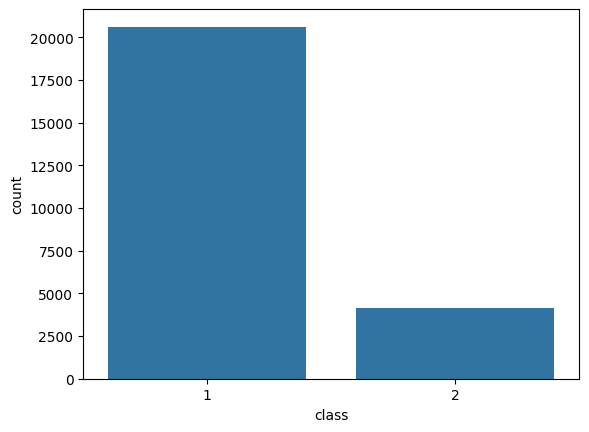

In [26]:
sns.countplot(x='class', data=raw_data)

In [27]:
raw_data['class'].replace({2:0}, inplace=True)

<ipython-input-27-7a9012eeae65>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_data['class'].replace({2:0}, inplace=True)


<Axes: xlabel='class', ylabel='count'>

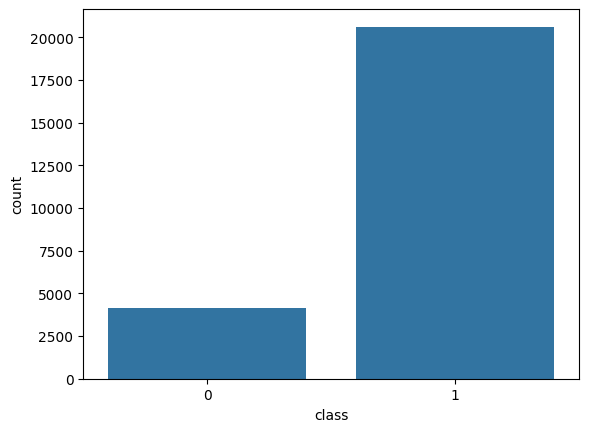

In [28]:
sns.countplot(x='class', data=raw_data)

In [29]:
imbalanced_data.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [30]:
raw_data.head()

,class,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [31]:
#changing raw_data class name to label,cxs it will match will imbalanced_dataset label
raw_data.rename(columns={'class':'label'}, inplace=True)

In [32]:
raw_data.head()

,label,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [33]:
#merging both datasets
frame = [imbalanced_data, raw_data]
df = pd.concat(frame)

In [34]:
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [35]:
df.shape

(56745, 2)

<Axes: xlabel='label', ylabel='count'>

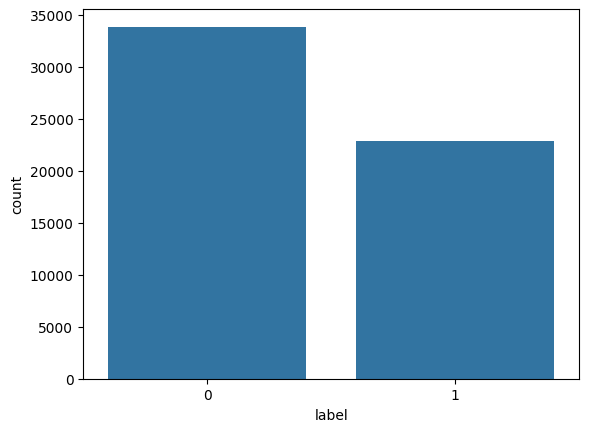

In [36]:
sns.countplot(x='label', data=df)

# Preprocessing

In [37]:
import re
import nltk
import string
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [68]:
# Let's apply stemming and stopwords on the data
stemmer = nltk.SnowballStemmer("english")
stopword = set(stopwords.words('english'))

In [69]:
stopword

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [82]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def data_cleaning(words):
    # Initialize stemmer and stopwords
    stemmer = PorterStemmer()
    stopword = set(stopwords.words('english'))

    # Convert to string and lowercase
    words = str(words).lower()

    # Remove emojis and special characters
    words = re.sub(r'[^\x00-\x7F]+', '', words)

    # Remove URLs
    words = re.sub('https?://\S+|www\.\S+', '', words)

    # Remove HTML tags
    words = re.sub('<.*?>', '', words)

    # Remove punctuation
    words = re.sub('[%s]' % re.escape(string.punctuation), '', words)

    # Remove newlines
    words = re.sub('\n', '', words)

    # Remove words containing digits
    words = re.sub('\w*\d\w*', '', words)

    # Remove stopwords
    words = [word for word in words.split() if word not in stopword]
    words = " ".join(words)

    # Apply stemming
    words = [stemmer.stem(word) for word in words.split()]
    words = " ".join(words)

    return words



In [83]:
df["tweet"]

,tweet
0,user father dysfunct selfish drag kid dysfunct...
1,user user thank lyft credit cant use caus dont...
2,bihday majesti bihday majesti bihday majesti b...
3,model love u take u time urð± ðððð...
4,factsguid societi motiv factsguid societi moti...
...,...
24778,you muthafin lie coreyemanuel right tl trash m...
24779,youv gone broke wrong heart babi drove redneck...
24780,young buck wanna eat dat nigguh like aint fuck...
24781,youu got wild bitch tellin li youu got wild bi...


In [84]:
df['tweet']=df['tweet'].apply(data_cleaning)

In [85]:
df['tweet'][1]

,tweet
1,user user thank lyft credit cant use cau dont ...
1,rt boy dat coldtyga dwn bad cuffin dat hoe pla...


In [86]:
df.head(100)

,label,tweet
0,0,user father dysfunct selfish drag kid dysfunct...
1,0,user user thank lyft credit cant use cau dont ...
2,0,bihday majesti bihday majesti bihday majesti b...
3,0,model love u take u time ur model love u take ...
4,0,factsguid societi motiv factsguid societi moti...
...,...,...
95,0,user ill alway hope one day ill get hug dont t...
96,0,model love u take u time ur model love u take ...
97,0,coupl sex fat nake japan girl coupl sex fat na...
98,0,hump hump day humper edwardsvil pennsylvania h...


In [87]:
x  = df['tweet']
y  =  df['label']

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 42)

print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

42558 42558
14187 14187


In [90]:


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences


In [91]:
max_words = 50000
max_len = 300

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)

sequences = tokenizer.texts_to_sequences(x_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)


In [102]:
x_train

,tweet
24029,pictur galleri live blackcavali caucasian webc...
769,shoutout everybodi follow nicca shoutout every...
8305,user user bet put second goal bottler user use...
2848,tattoosleev gorilla simul need adapt environ n...
12998,boy ryanbowersob got hoe boy ryanbowersob got ...
...,...
22381,ummmso happi fairi appar took crap twitter mad...
6196,ivanrabago least put caption steal pic fag lol...
860,black professor make assumpt entir race whilst...
15795,lgbtqhatetrumppay total liber trash amp pathet...


In [93]:
sequences_matrix
print("sequences:", sequences_matrix)

sequences: [[    0     0     0 ... 38525  7310  3735]
 [    0     0     0 ...   416    87   353]
 [    0     0     0 ...   676   651 30974]
 ...
 [    0     0     0 ...   106    72  1262]
 [    0     0     0 ...   785 10957   671]
 [    0     0     0 ...   326   295     2]]


In [94]:
print(tokenizer.word_index)


{'user': 1, 'bitch': 2, 'rt': 3, 'like': 4, 'love': 5, 'im': 6, 'get': 7, 'day': 8, 'hoe': 9, 'amp': 10, 'dont': 11, 'u': 12, 'fuck': 13, 'go': 14, 'happi': 15, 'nigga': 16, 'pussi': 17, 'got': 18, 'make': 19, 'time': 20, 'want': 21, 'one': 22, 'ass': 23, 'cant': 24, 'know': 25, 'look': 26, 'see': 27, 'shit': 28, 'thank': 29, 'life': 30, 'peopl': 31, 'good': 32, 'girl': 33, 'need': 34, 'us': 35, 'new': 36, 'today': 37, 'say': 38, 'take': 39, 'think': 40, 'aint': 41, 'lol': 42, 'feel': 43, 'come': 44, 'work': 45, 'back': 46, 'realli': 47, 'call': 48, 'friend': 49, 'trash': 50, 'never': 51, 'man': 52, 'father': 53, 'even': 54, 'way': 55, 'smile': 56, 'let': 57, 'year': 58, 'hate': 59, 'right': 60, 'still': 61, 'talk': 62, 'wait': 63, 'posit': 64, 'live': 65, 'yall': 66, 'thing': 67, 'bihday': 68, 'best': 69, 'play': 70, 'ur': 71, 'week': 72, 'would': 73, 'tri': 74, 'bull': 75, 'use': 76, 'bad': 77, 'watch': 78, 'first': 79, 'much': 80, 'beauti': 81, 'well': 82, 'yo': 83, 'give': 84, 'ho'

In [103]:
print(sequences_matrix.shape)


(42558, 300)


In [107]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from keras.optimizers import RMSprop
import numpy as np

# Initialize parameters
max_words = 50000
max_len = 300

# Model architecture
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=100))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(
    optimizer=RMSprop(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Force the model to build by passing a dummy input with the correct shape
model.build(input_shape=(None, max_len))

# Display the model summary
model.summary()


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)              │ (None, 300, 100)            │       5,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_8                  │ (None, 300, 100)            │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,080,501 (19.38 MB)

 Trainable params: 5,080,501 (19.38 MB)

 Non-trainable params: 0 (0.00 B)

In [108]:
   sequences_matrix

array([[    0,     0,     0, ..., 38525,  7310,  3735],
       [    0,     0,     0, ...,   416,    87,   353],
       [    0,     0,     0, ...,   676,   651, 30974],
       ...,
       [    0,     0,     0, ...,   106,    72,  1262],
       [    0,     0,     0, ...,   785, 10957,   671],
       [    0,     0,     0, ...,   326,   295,     2]], dtype=int32)

In [110]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    sequences_matrix,
    y_train,
    batch_size=128,
    epochs=100,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)



Epoch 1/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 141s 529ms/step - accuracy: 0.9601 - loss: 0.1245 - val_accuracy: 0.9440 - val_loss: 0.1671
Epoch 2/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 142s 530ms/step - accuracy: 0.9700 - loss: 0.1030 - val_accuracy: 0.9421 - val_loss: 0.1717
Epoch 3/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 142s 529ms/step - accuracy: 0.9735 - loss: 0.0916 - val_accuracy: 0.9430 - val_loss: 0.1791
Epoch 4/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 141s 528ms/step - accuracy: 0.9761 - loss: 0.0835 - val_accuracy: 0.9387 - val_loss: 0.1735
Epoch 5/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 141s 525ms/step - accuracy: 0.9806 - loss: 0.0728 - val_accuracy: 0.9377 - val_loss: 0.1837
Epoch 6/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 142s 525ms/step - accuracy: 0.9823 - loss: 0.0638 - val_accuracy: 0.9387 - val_loss: 0.1956


In [111]:
test_sequences = tokenizer.texts_to_sequences(x_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

In [112]:
test_sequences_matrix

array([[3000, 1718, 1018, ..., 1411,    2, 3000],
       [   0,    0,    0, ...,  816, 2342, 9545],
       [   0,    0,    0, ...,  190,  233, 1017],
       ...,
       [   0,    0,    0, ...,  199,   20,  312],
       [   0,    0,    0, ...,  337,    1,    1],
       [   0,    0,    0, ...,  245,  736, 3256]], dtype=int32)

In [113]:
# Model evaluation
accr = model.evaluate(test_sequences_matrix,y_test)

444/444 ━━━━━━━━━━━━━━━━━━━━ 53s 119ms/step - accuracy: 0.9396 - loss: 0.1815


In [114]:
lstm_prediction = model.predict(test_sequences_matrix)

444/444 ━━━━━━━━━━━━━━━━━━━━ 107s 122ms/step


In [115]:
res = []
for prediction in lstm_prediction:
    if prediction[0] < 0.5:
        res.append(0)
    else:
        res.append(1)


In [116]:
from sklearn.metrics import confusion_matrix

In [117]:
print(confusion_matrix(y_test,res))

[[8069  384]
 [ 484 5250]]


In [118]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [119]:
# Let's save the mdoel.
model.save("model.h5")

In [120]:
import keras

In [121]:
load_model=keras.models.load_model("model.h5")
with open('tokenizer.pickle', 'rb') as handle:
    load_tokenizer = pickle.load(handle)


In [135]:
# Let's test our model on custom data.
test = 'mount everest is beautiful'

def clean_text(text):
    print(text)
    text = str(text).lower()
    text = re.sub('', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    print(text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text


test=[clean_text(test)]
print(test)

seq = load_tokenizer.texts_to_sequences(test)
padded = pad_sequences(seq, maxlen=300)
print(seq)

pred = load_model.predict(padded)

print("pred", pred)
if pred<0.5:
    print("no hate")
else:
    print("hate and abusive")


mount everest is beautiful
mount everest is beautiful
['mount everest beauti']
[[3693, 8841, 81]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
pred [[0.10814082]]
no hate
